In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
'''
learn from Dimitrios
'''

In [3]:
train = pd.read_csv('./data/train_V2.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [5]:
# groupId: different in each match for each teams
# matchId: the id of mathc
# assists: 助攻
# boosts: 能量饮料...
# damageDebalt: 造成伤害量
# DBNOs: 击杀
# headshotKills: 爆头击杀
# heals: 绷带...
# killPlace: 击杀榜排行 in match
# killPoint: 击杀能力，The Elo rating system is a method for calculating the relative skill levels of players in zero-sum games such as chess
# killStreaks: 爆发击杀能力
# kills: 总击杀数
# longestKill: 最远击杀距离
# matchDuration: 比赛市场
# matchType: 单排，双排，四排，第一视角～
# rankPoints: 总榜能力
# revives: 拉队友次数
# rideDistance: 开车距离
# roadKills: 车上击杀
# swimDistance: 游泳距离
# teamKills: 击杀队友次数
# vehicleDestroys: 炸车数
# walkDistance: 行走距离
# weaponsAcquired: 捡到武器数量
# winPoints: 总榜胜利点数
# numGroups: 总玩家数量（该轮比赛中）
# winPlacePerc: 获胜地点百分比
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [31]:
# kill data
print("The average person kills {:.4f} players".format(train["kills"].mean()))
# pd.DF.quantile: Return values at the given quantile over requested axis.
print("99% of pepole kill less than {}".format(train["kills"].quantile(.99)))
print("max killer: {}".format(train["kills"].max()))


The average person kills 0.9248 players
99% of pepole kill less than 7.0
max killer: 72


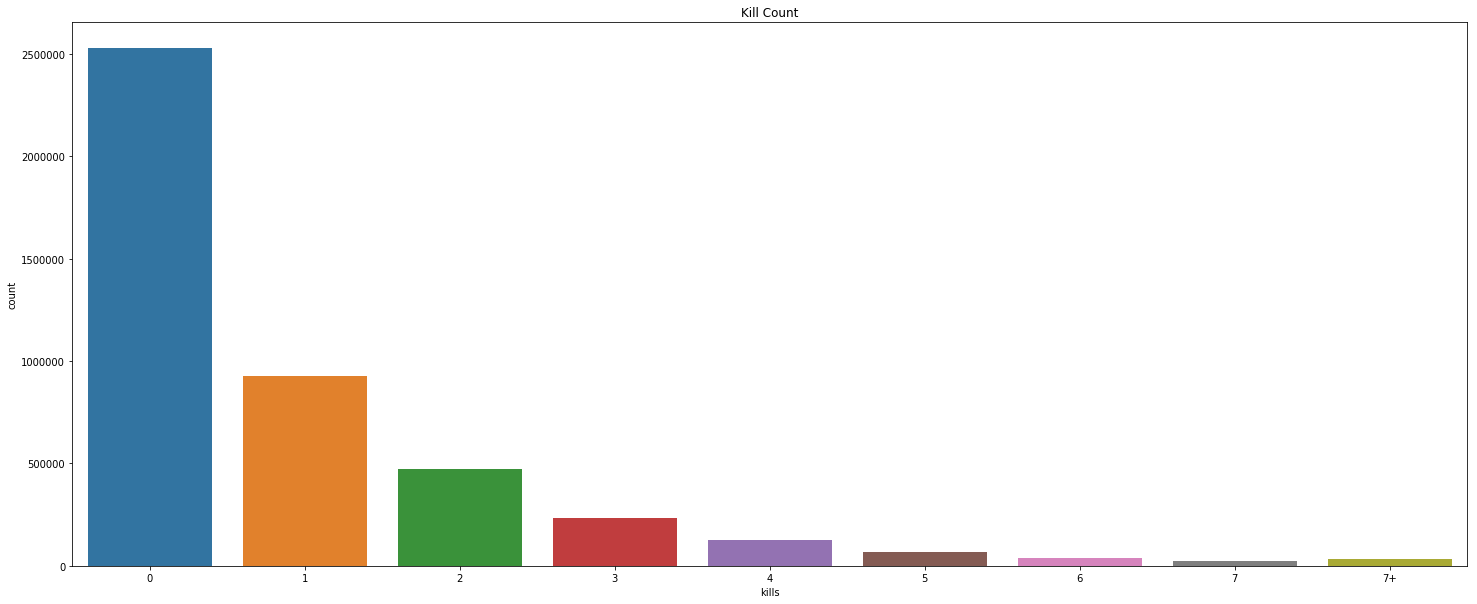

In [32]:
# kill plot
data = train.copy()
# 大于某数算入一集
# pd.DF.loc: Access a group of rows and columns by label(s) or a boolean array.
# data.loc[data['kills'] > data['kills'].quantile(0.8)] = '2+'
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '7+'
plt.figure(figsize=(25,10))
# sns.countplot 自动打好标签,count,横坐标根据计量自动分布
# 10类以后sort貌似有bug，data loc 相当于提前给予了上界，然而sort的是string类，所以11会比2海啸
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count")
plt.show()

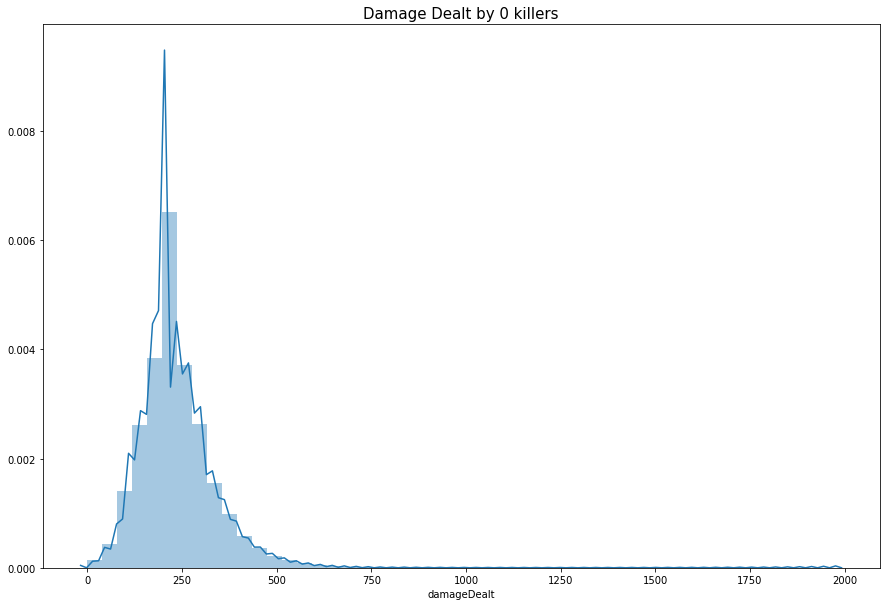

In [35]:
data = train.copy()
data = data[data['kills'] == 2]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
# sns.distplot 可视化分布
sns.distplot(data['damageDealt'])
plt.show()

In [40]:
print("{} players ({:.4f}%) have won without a single kill".format(len(data[data["winPlacePerc"]==1]),
                                                                 100 * len(data[data["winPlacePerc"]==1]) / len(train)))
zeroDmgData = train[train["damageDealt"] ==0].copy()
print("{} players ({:.4f}%) have won without a single kill and damage".format(len(zeroDmgData[zeroDmgData["winPlacePerc"]==1]),
                                                                 100 * len(zeroDmgData[zeroDmgData["winPlacePerc"]==1]) / len(train)))


19192 players (0.4316%) have won without a single kill
4770 players (0.1073%) have won without a single kill and damage


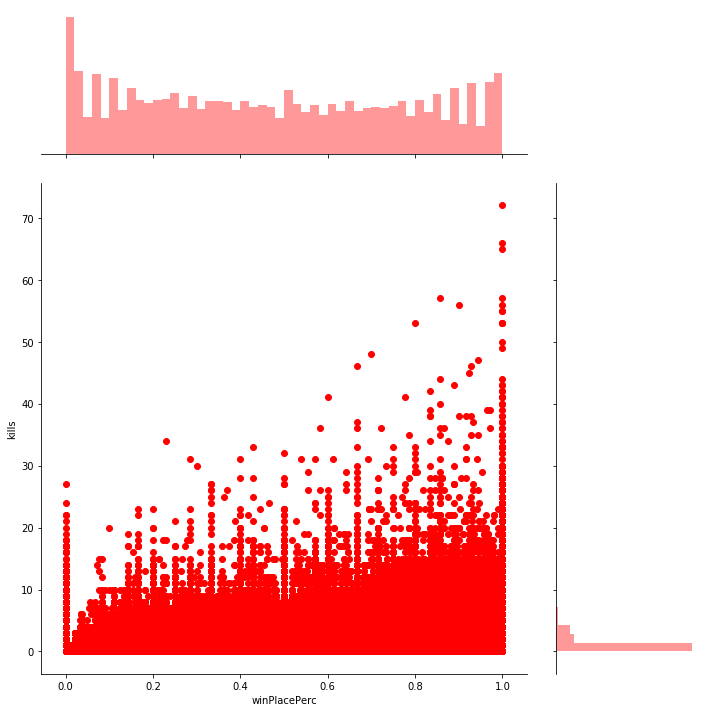

In [41]:
# Draw a plot of two variables with bivariate and univariate graphs
sns.jointplot(x = "winPlacePerc",y = "kills",data = train,height = 10,ratio=3,color ='r')
# killing correlate with winning

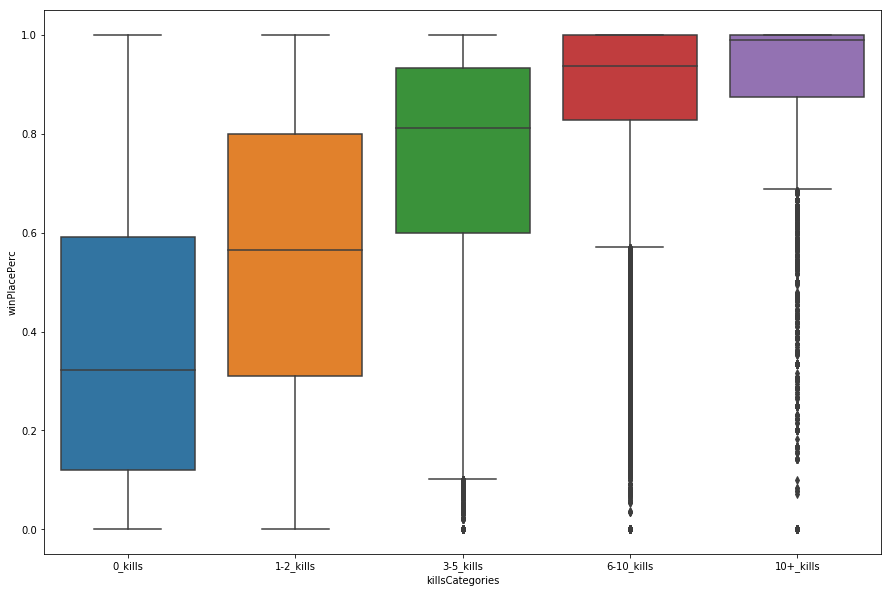

In [43]:
kills = train.copy()
# pd.cut: Bin values into discrete intervals.
kills['killsCategories'] = pd.cut(kills['kills'],[-1,0,2,5,10,60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])
plt.figure(figsize=(15,10))
sns.boxplot('killsCategories',y = 'winPlacePerc',data =kills)

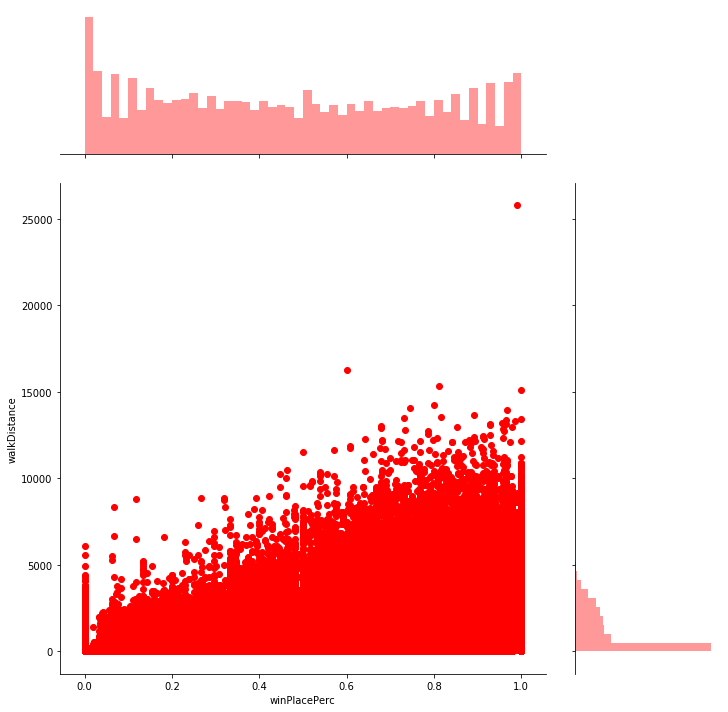

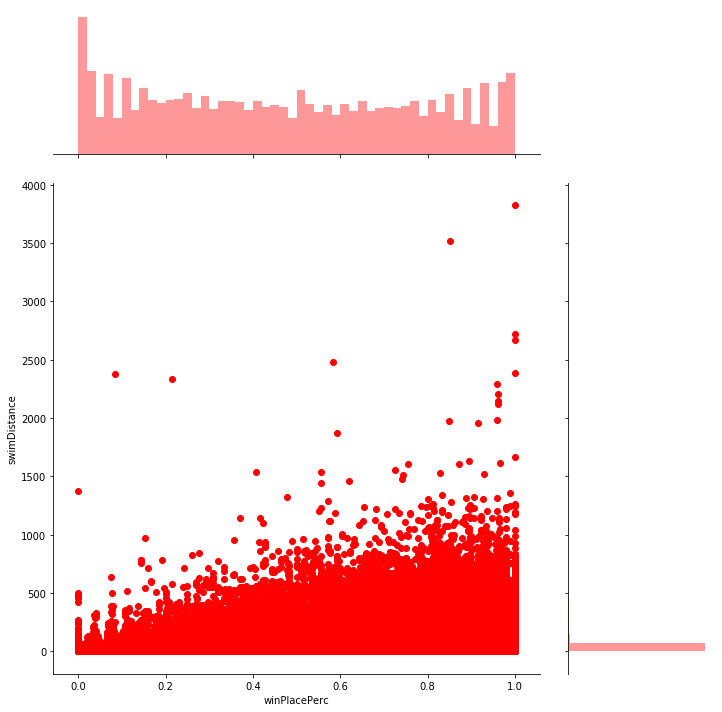

In [53]:
# check if walk correlate to win
# Draw a plot of two variables with bivariate and univariate graphs
sns.jointplot(x = "winPlacePerc",y = "walkDistance",data = train,height = 10,ratio=3,color ='r')
# walking correlate with winning
# 显然活得越久跑的越多，但是游泳呢？
# 由图可见，也是，但是大部分人都不游泳
sns.jointplot(x = "winPlacePerc",y = "swimDistance",data = train,height = 10,ratio=3,color ='r')

In [49]:
print("{:.1f}".format(train['walkDistance'].mean()),train['walkDistance'].quantile(.99),train['walkDistance'].max())

1154.2 4396.0 25780.0


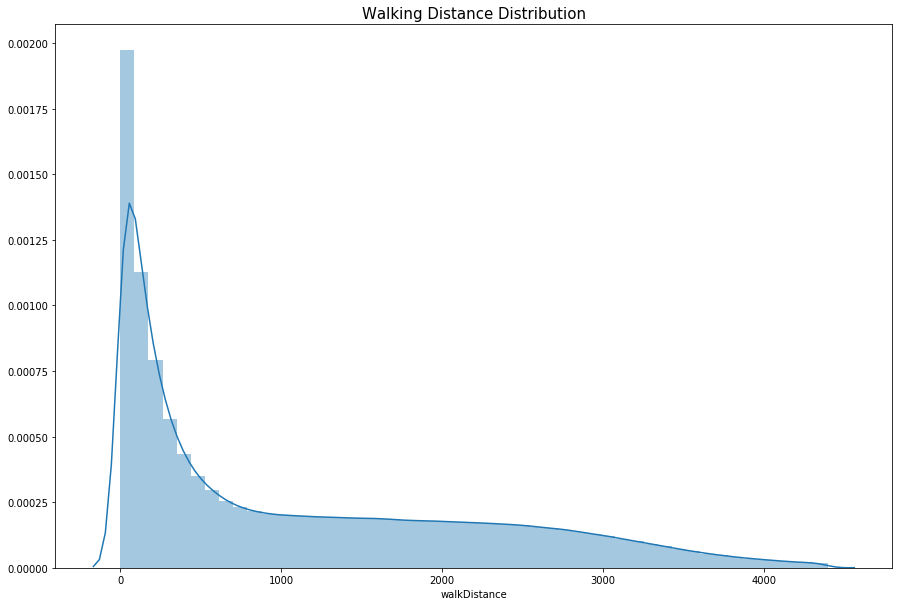

In [52]:
data = train.copy()
# 限制一下x轴
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [54]:
# Healer vs Boosts
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.


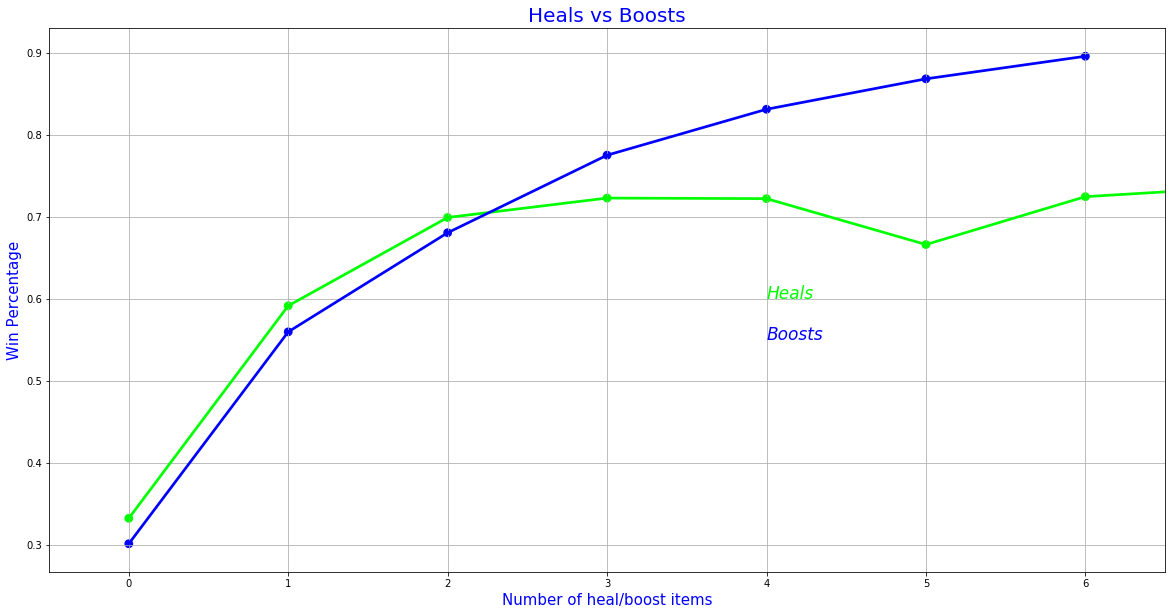

In [56]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(.99)]
data = data[data['boosts'] < data['boosts'].quantile(.99)]
# plt.subplots: create a figure an a set of subplots
f,ax1 = plt.subplots(figsize=(20,10))
#有了subplots之后sns就可以为所欲为了？
sns.pointplot(x='heals',y='winPlacePerc',data=data,color ='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()

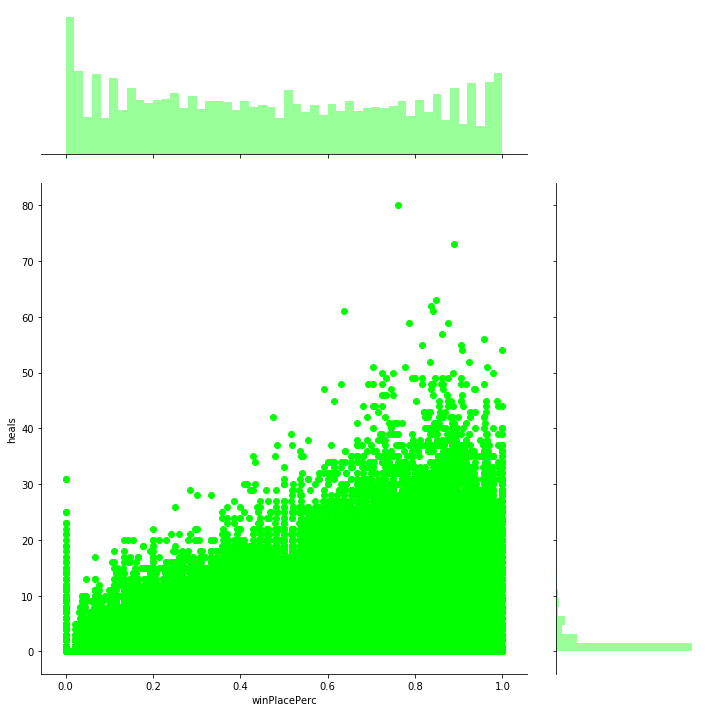

In [57]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="lime")
plt.show()

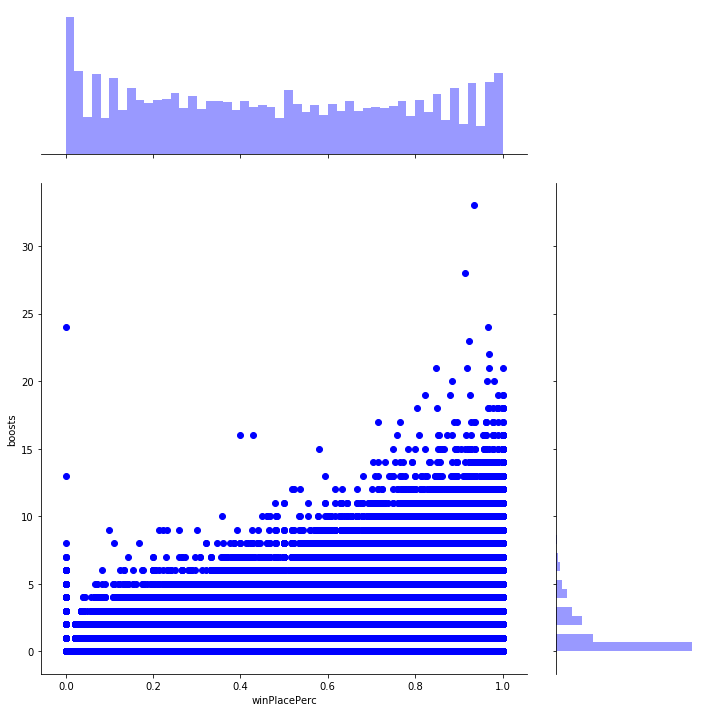

In [58]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="blue")
plt.show()

In [59]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

There are 709111 (15.95%) solo games, 3295326 (74.10%) duo games and 442529 (9.95%) squad games.


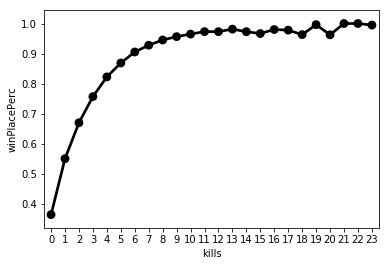

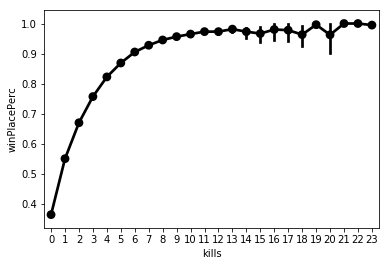

In [63]:
# 竖线：provides some indication of the uncertainty around that estimate using error bars.
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8,ci=None)
plt.show()
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
plt.show()

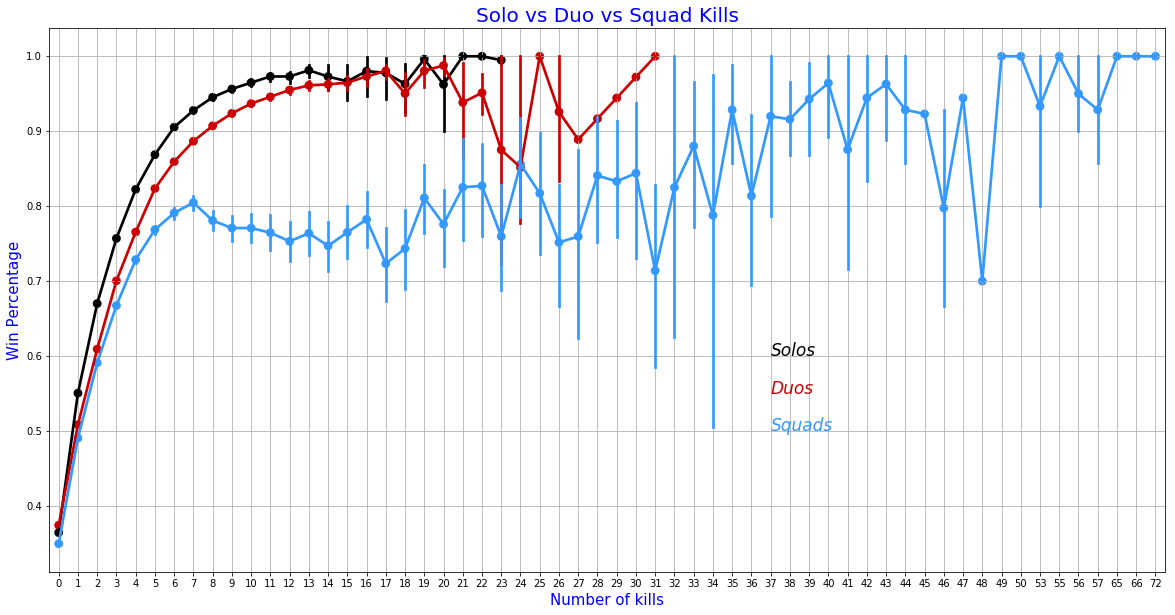

In [64]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

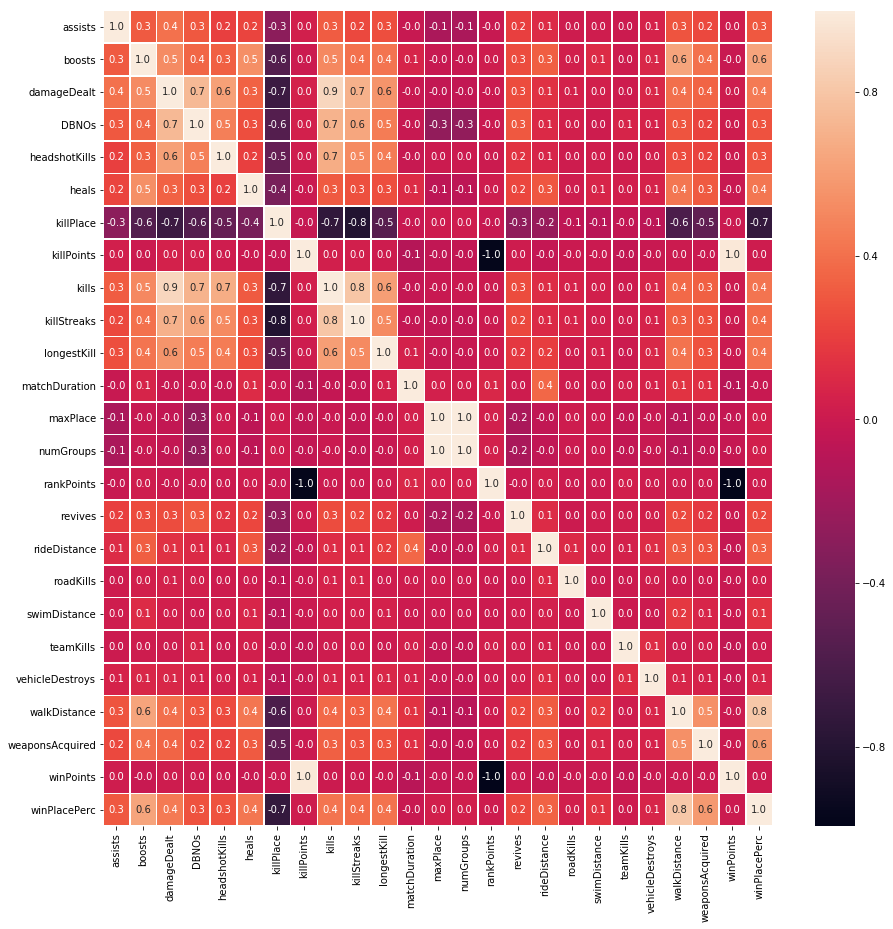

In [67]:
# Pearson correlation between variables
f,ax = plt.subplots(figsize=(15, 15))
# train.correlation
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

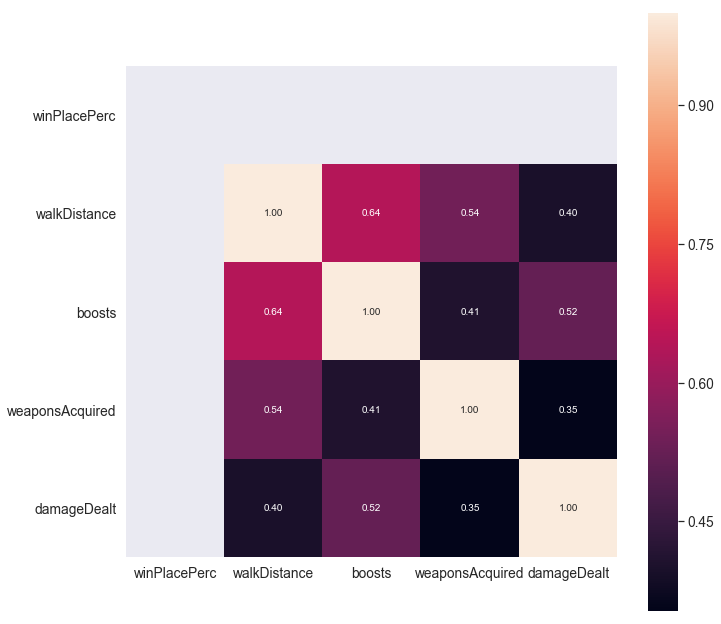

In [77]:
# find the 5 most correlated variables with label
k = 5
train = pd.read_csv('./data/train_V2.csv')
f,ax = plt.subplots(figsize=(11, 11))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [81]:
sns.set()
# winPlacePerc的数据有点问题
cols = ['walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
sns.pairplot(train[cols], size = 2.5)
plt.show()

KeyboardInterrupt: 